<a href="https://colab.research.google.com/github/apd2599/Training_2021_CIRCUIT/blob/main/Scikit-Learn_Dataset/Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import random_projection
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn import tree

In [67]:
db_data = datasets.load_diabetes()

In [68]:
print(db_data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

# Data Preprocessing

In [69]:
data = db_data['data']
target = db_data['target']
features = db_data['feature_names']

In [70]:
data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [71]:
target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [72]:
data_ss = StandardScaler().fit_transform(data)
Xdf = pd.DataFrame(data_ss, columns=features)
ys = pd.Series(target)

In [73]:
Xdf 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256044,-0.119769,-0.053957,-0.602843,-0.054499,0.655795,0.151508
438,-0.115937,1.065488,-0.334410,-1.422098,1.037341,1.664355,-0.602843,0.721302,-0.380915,0.935254
439,0.876870,1.065488,-0.334410,0.363330,-0.785107,-0.290965,-0.525441,-0.232934,-0.985585,0.325674
440,-0.956004,-0.938537,0.821235,0.025547,0.343075,0.321306,-0.602843,0.558384,0.936155,-0.545154


In [74]:
ys

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Length: 442, dtype: float64

In [75]:
Xdf.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [76]:
#ys = ys.cumsum()
#ys.plot()

In [77]:
n_Xdf = pd.DataFrame(data, columns=features)

In [78]:
n_Xdf

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [79]:
Xdf

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256044,-0.119769,-0.053957,-0.602843,-0.054499,0.655795,0.151508
438,-0.115937,1.065488,-0.334410,-1.422098,1.037341,1.664355,-0.602843,0.721302,-0.380915,0.935254
439,0.876870,1.065488,-0.334410,0.363330,-0.785107,-0.290965,-0.525441,-0.232934,-0.985585,0.325674
440,-0.956004,-0.938537,0.821235,0.025547,0.343075,0.321306,-0.602843,0.558384,0.936155,-0.545154


In [80]:
Xdf.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

# Exploratory Data Analysis

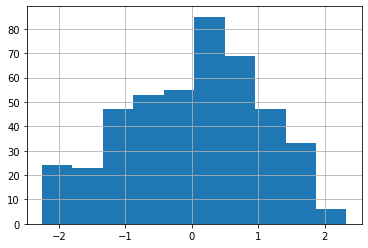

In [81]:
Xdf.age.hist()

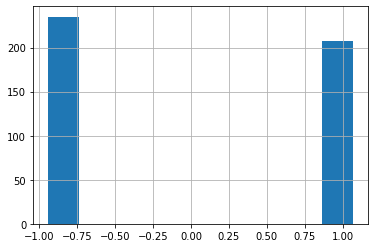

In [82]:
Xdf.sex.hist()

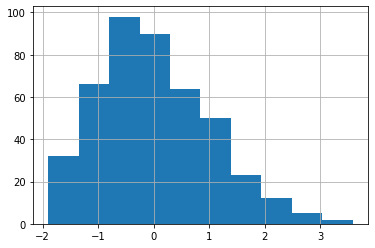

In [83]:
Xdf.bmi.hist()

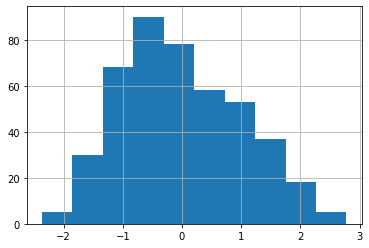

In [84]:
Xdf.bp.hist()

The boxplot has a minimum, first quartile (25%), median, third quartile (75%), and maximum

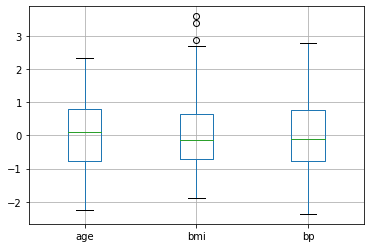

In [85]:
Xdf.boxplot(column = ['age', 'bmi', 'bp'])

In [86]:
Xdf[['age', 'bmi', 'bp']].corr()

,age,bmi,bp
age,1.000000,0.185085,0.335427
bmi,0.185085,1.000000,0.395415
bp,0.335427,0.395415,1.000000


It appears that there is no strong correlations between any of these variables

In [87]:
Xdf[['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].corr()

,age,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
bmi,0.185085,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


The only positive strong correlation in this table is between s1 adn s2. It seems that these blood serum measurements are both associated with each other. There is moderate correlation between s2 and s4, s5 and s4, s6 and s4, s6 and s5, s1 and s4, and s5 and s1

# Model Building

In [88]:
X_train, X_test, y_train, y_test = train_test_split(Xdf, ys, test_size=0.2, random_state=42)

In [89]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,1.487828,1.065488,0.254742,1.183662,0.719136,1.038916,-0.835049,0.721302,0.575373,-0.022657
66,-0.192307,1.065488,-0.379729,-0.698275,-0.437974,0.255471,-1.531667,1.497104,0.005708,0.412757
137,0.113172,-0.938537,1.047832,2.052249,-0.322263,-0.343634,-0.138431,-0.054499,0.358185,-0.283906
245,-0.574155,-0.938537,-0.742285,-0.625893,-1.190096,-1.232416,0.635590,-0.830301,-1.048424,-2.722224
31,-0.497786,-0.938537,-1.376756,-1.711626,-0.814035,-1.127079,1.254806,-1.606102,-0.780579,-0.893485
...,...,...,...,...,...,...,...,...,...,...
106,-2.025181,-0.938537,-1.603353,-0.915422,-0.958674,-0.732065,0.171178,-0.830301,-1.250342,-1.764314
270,0.113172,1.065488,0.639957,1.762720,-0.785107,-0.995407,0.325982,-0.830301,0.181652,0.325674
348,0.647761,-0.938537,-0.425049,-0.119218,-0.090841,-0.620144,1.641816,-0.830301,-0.229253,-0.022657
435,-0.268676,-0.938537,-0.493028,-0.843040,-0.351191,0.097465,-0.370637,-0.054499,-0.808557,-0.806403


In [90]:
model = LinearRegression()

In [91]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
ypred = model.predict(X_test)
ypred

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

In [93]:
print(y_test)

287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
       ...  
255    153.0
90      98.0
57      37.0
391     63.0
24     184.0
Length: 89, dtype: float64


In [94]:
print(mean_squared_error(y_test, ypred))
#print(precision_score(y_test, ypred))
#print(recall_score(y_test, ypred))

2900.1732878832327


In [95]:
r2_score(y_test, ypred)

0.45260660216173776

([<matplotlib.axis.YTick at 0x7f04cf2040d0>,
 [Text(0, 0, 'age'),
  Text(0, 0, 'sex'),
  Text(0, 0, 'bmi'),
  Text(0, 0, 'bp'),
  Text(0, 0, 's1'),
  Text(0, 0, 's2'),
  Text(0, 0, 's3'),
  Text(0, 0, 's4'),
  Text(0, 0, 's5'),
  Text(0, 0, 's6'),
  Text(0, 0, 'target')])

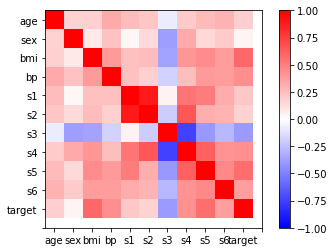

In [99]:
#Create the correlation table
Xdf['target'] = ys
plt.imshow(Xdf.corr(), cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(np.arange(0, 12, 1), Xdf.columns)
plt.yticks(np.arange(0, 12, 1), Xdf.columns)

In [97]:
Xdf.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483
